#### Monday, June 3, 2024

*** mamba activate maaodl ***

This all runs in one pass.

### Rotation Matrices 

In [1]:
import torch
import numpy as np
from math import cos, sin, radians
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
# 2D Rotation Matrix: [cos(theta) -sin(theta)
#                      sin(theta)  cos(theta)]
def rotation_matrix_2d(theta):
    """
    theta: angle in degrees
    Returns the 2D matrix that performs in-plane rotation by angle
    theta about origin.
    This means, multiplication with this matrix will move a point
    to a new location.
    The angle between
        the line joining original point with origin
        and
        the line joining new point with origin
    is theta.
    """
    return torch.tensor([[cos(radians(theta)), -sin(radians(theta))],
                     [sin(radians(theta)), cos(radians(theta))]])


#### Rotation by angle θ in 3D space

In [4]:
def rotation_matrix_3d(theta, axis):
    """
    theta: angle in degrees
    axis: Axis of rotation, can be 0, 1 or 2 corresponding to x, y or z
          axis respectively.
    Returns the matrix that will rotate a point in 3D space about the
    chosen axis of rotation by angle theta degrees.
    """
    if axis == 0:
        return torch.tensor([[1, 0, 0],
                         [0, cos(radians(theta)), -sin(radians(theta))],
                         [0, sin(radians(theta)), cos(radians(theta))]])
    elif axis == 1:
        return torch.tensor([[cos(radians(theta)), 0, -sin(radians(theta))],
                         [0, 1, 0],
                         [sin(radians(theta)), 0, cos(radians(theta))]])
    elif axis == 2:
        return torch.tensor([[cos(radians(theta)), -sin(radians(theta)), 0],
                         [sin(radians(theta)), cos(radians(theta)), 0],
                         [0, 0, 1]])

In [5]:
# Let us consider the vector [1, 0, 0]
import math
u = torch.tensor([1, 0, 0], dtype=torch.float)
u = u.reshape((3, 1)) #Reshape it to represent a row vector
print("Original vector\n{}\n".format(u))
# Rotate it by 30 degrees around Z Axis
angle_of_rotation = 30.0
R = rotation_matrix_3d(angle_of_rotation, 2)
print("Rotation matrix for {} degrees around Z Axis is\n{}\n".\
      format(angle_of_rotation, R))
v = torch.matmul(R, u)
print("Vector after rotation\n{}".format(v))


def get_angle(u, v):
    """
    Computes angle between two vectors using arc cosine
    """
    u = torch.squeeze(u)
    v = torch.squeeze(v)
    assert len(u.shape) == 1 and  len(v.shape) == 1
    return math.degrees(math.acos((torch.dot(u, v)
                                   / (torch.linalg.norm(u) *
                                      torch.linalg.norm(v)))))
    

# Angle between u and v
angle_u_v = get_angle(u, v)
print("Angle between the two vectors {}".format(angle_u_v))
assert np.allclose(angle_u_v, angle_of_rotation)

Original vector
tensor([[1.],
        [0.],
        [0.]])

Rotation matrix for 30.0 degrees around Z Axis is
tensor([[ 0.8660, -0.5000,  0.0000],
        [ 0.5000,  0.8660,  0.0000],
        [ 0.0000,  0.0000,  1.0000]])

Vector after rotation
tensor([[0.8660],
        [0.5000],
        [0.0000]])
Angle between the two vectors 30.000001781168113


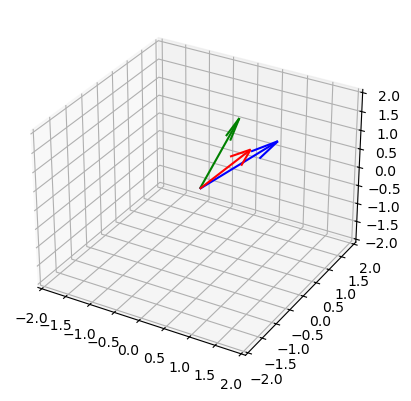

In [6]:
# Python provides powerful libraries to plot
# vectors and curves and surfaces in 3D. Some
# examples.
def plot_vector(ax, row_vector, color="cyan"):
    """
    Plot a 3D vector in specified color
    """
    assert len(row_vector == 3)
    v = torch.squeeze(row_vector)
    ax.quiver(0, 0, 0, row_vector[0], row_vector[1],
              row_vector[2], color=color)

    
from mpl_toolkits.mplot3d import Axes3D    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Let us now visualise the vectors in 3D 
u = torch.tensor([1, 1, 1], dtype=torch.float)

 #Reshape to represent as a row vector
u_row = u.reshape((3, 1))
plot_vector(ax, u_row, color="blue")

# Rotate it 45 degrees around Z axis
R = rotation_matrix_3d(45, 2)
v_row = torch.matmul(R, u_row)
plot_vector(ax, v_row, color="green")

# Rotate again by 45 around X axis
R = rotation_matrix_3d(45, 0)
w_row = torch.matmul(R, u_row)
plot_vector(ax, w_row, color="red")

plt.show()

#### Orthogonality of rotation matrices

In [7]:
R_30 = rotation_matrix_2d(30)

print("Matrix to rotate in-plane by 30 degrees"
      "about origin:\n{}".format(R_30))
# Inverse of rotation matrix is same as the transpose, this
# is orthogonality.

# torch.allclose is used to determine if all elements are equal
# within tolerance. The inv(erse) and transpose of rotation
# matrix should be equal (due to floating point errors may
# not be perfectly equal, hence we check for closeness
# with very low tolerance).
assert torch.allclose(torch.linalg.inv(R_30),
                   R_30.T)
# Equivalently, if we multiply a rotation matrix and its
# transpose, we get the identity matrix.
# torch.eye(N) returns an N x N Identity matrix.
assert torch.allclose(torch.matmul(R_30, R_30.T),
                   torch.eye(2))

# Let us take a random point (4, 0)
u = torch.tensor([[4],[0]], dtype=torch.float)

# Rotate it by 30 degrees
v = torch.matmul(R_30, u)

print("Original vector u:\n{}".format(u))
print("Rotated Vector v:\n{}".format(v))

print("Length of u: {}".format(torch.linalg.norm(u)))
print("Length of v: {}".format(torch.linalg.norm(v)))

# We assert that rotation is length preserving
assert torch.linalg.norm(u) == torch.linalg.norm(v)


Matrix to rotate in-plane by 30 degreesabout origin:
tensor([[ 0.8660, -0.5000],
        [ 0.5000,  0.8660]])
Original vector u:
tensor([[4.],
        [0.]])
Rotated Vector v:
tensor([[3.4641],
        [2.0000]])
Length of u: 4.0
Length of v: 4.0


In [8]:
# Let us now negate the rotation i.e rotate the point
# back by -30 degrees
R_neg30 = rotation_matrix_2d(-30)

print("Matrix to rotate in-plane by -30 degrees"
      " about origin\n{}".format(R_neg30))

# We will rotate v by -30 degrees
w = torch.matmul(R_neg30, v)
print("Re-Rotated Vector w:\n{}".format(w))

# We assert that this vector is the same as the original
# vector u
assert torch.all(w == u)

# We also assert that R_neg30 is the transpose and
# the inverse of R_30
assert torch.allclose(R_30, R_neg30.T)
assert torch.allclose(torch.matmul(R_30, R_neg30), torch.eye(2))

Matrix to rotate in-plane by -30 degrees about origin
tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]])
Re-Rotated Vector w:
tensor([[4.],
        [0.]])


In [9]:
import torch.linalg as LA
# Let us now compute the eigen values and eigen vectors of
# the rotation matrix

# Matrix for rotation by 45 degrees about origin.
R = torch.tensor([[0.7071, 0.7071, 0], [-0.7071, 0.7071, 0],
              [0, 0, 1]])
# As seen in the previous section, A is a rotation matrix
# around the Z axis
l, e = LA.eig(R)

# We know that all rotation matrices will have 1 as one of
# its eigenvalues.
# The eigen vector corresponding to that value is the axis
# of rotation

# torch.where returns the indices where the specified condition
# is satisfied.
axis_of_rotation = e[:, torch.where(l == 1.0)]

# torch.squeeze is used to remove dimensions of size 1
axis_of_rotation = torch.squeeze(axis_of_rotation)

print("Axis of rotation is: {}".format(axis_of_rotation))

# Let us take a random point on the axis of rotation 
p = torch.randint(0, 10, (1,)) * axis_of_rotation
print("Point of axis of rotation: {}".format(p))

# Point on the axis of rotation remain unchanged even
# after rotation. Thus vector p and its transform Rp
# are close.

assert torch.allclose(torch.matmul(R, p.real), p.real)

Axis of rotation is: tensor([0.+0.j, 0.+0.j, 1.+0.j])
Point of axis of rotation: tensor([0.+0.j, 0.+0.j, 2.+0.j])
